## Pengenalan
Tujuan dari model ini adalah untuk mengenali bentuk dari 8 kunci dasar gitar

## Import

In [470]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## Load Data

In [261]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

trainPath = 'Data/train/'
valPath = 'Data/val/'
testPath = 'Data/test/'

In [262]:
#Training
train = tf.keras.utils.image_dataset_from_directory(trainPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(valPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Test
test = tf.keras.utils.image_dataset_from_directory(testPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

Found 1059 files belonging to 7 classes.
Found 140 files belonging to 7 classes.
Found 215 files belonging to 7 classes.


## Visualisasi Data

In [263]:
# class names
class_names = train.class_names
class_names

['A', 'B', 'C', 'D', 'E', 'F', 'G']

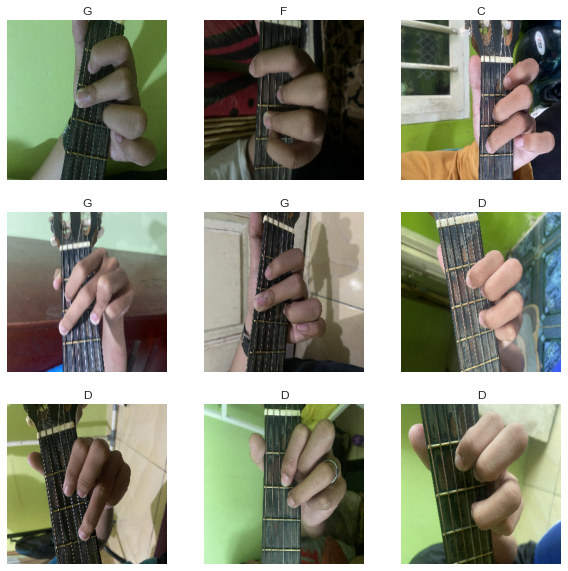

In [264]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [265]:
trainTemp = train.unbatch()
labels = []
for x, y in trainTemp:
    index = np.argmax(y)
    labels.append(class_names[index])

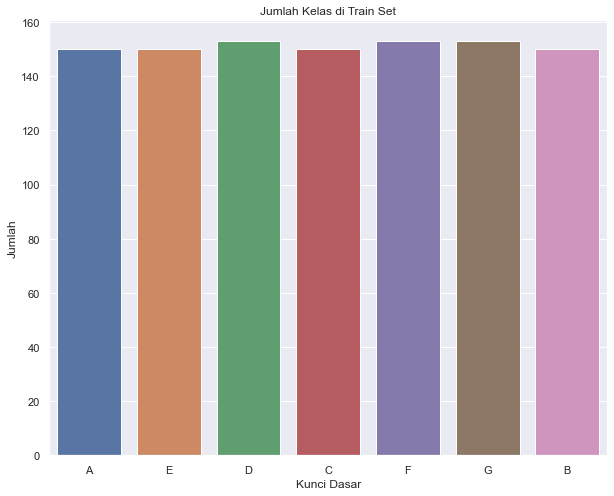

In [266]:
plt.figure(figsize=(10, 8))

sns.set_theme()


sns.countplot(x=labels)
plt.xlabel('Kunci Dasar')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

In [267]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Grayscale
def rgb2gray(image, label):
  return tf.image.rgb_to_grayscale(image), label

#Tambah tingkat keterangan
def random_brightness(image, label):
  return tf.image.random_brightness(image,max_delta=0.5), label


def augment_using_ops(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.rot90(images)
	return images, labels

In [268]:
train = train.map(rgb2gray).map(normalize_img).map(random_brightness)
test = test.map(rgb2gray).map(normalize_img)
validation = validation.map(rgb2gray).map(normalize_img)

## Modelling

In [269]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[256, 256, 1]),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.6),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(7, activation='softmax')
])

In [270]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 62, 62, 16)        0         
                                                                 
 flatten_16 (Flatten)        (None, 61504)           

In [271]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [272]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

In [273]:
hasil = model.fit(train, epochs=30,batch_size=32,validation_data=validation,verbose=1,callbacks=[earlyStopping])

Epoch 1/30
34/34 [==============================] - 47s 1s/step - loss: 1.9105 - accuracy: 0.2455 - val_loss: 1.7874 - val_accuracy: 0.2714
Epoch 2/30
34/34 [==============================] - 46s 1s/step - loss: 1.6241 - accuracy: 0.3881 - val_loss: 1.4453 - val_accuracy: 0.4500
Epoch 3/30
34/34 [==============================] - 46s 1s/step - loss: 1.2272 - accuracy: 0.5515 - val_loss: 1.2070 - val_accuracy: 0.5643
Epoch 4/30
34/34 [==============================] - 46s 1s/step - loss: 1.0002 - accuracy: 0.6544 - val_loss: 1.0547 - val_accuracy: 0.6571
Epoch 5/30
34/34 [==============================] - 47s 1s/step - loss: 0.7204 - accuracy: 0.7790 - val_loss: 0.9899 - val_accuracy: 0.6500
Epoch 6/30
34/34 [==============================] - 46s 1s/step - loss: 0.5280 - accuracy: 0.8480 - val_loss: 0.9416 - val_accuracy: 0.6357
Epoch 7/30
34/34 [==============================] - 43s 1s/step - loss: 0.3646 - accuracy: 0.8980 - val_loss: 0.6465 - val_accuracy: 0.8143
Epoch 8/30
34/34 [==

## Evaluate

#### Evaluasi Test Set

In [278]:
test_evaluate = model.evaluate(test,verbose =0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.7253872156143188
Test accuracy : 0.78


#### Bandingkan perkembangan epoch

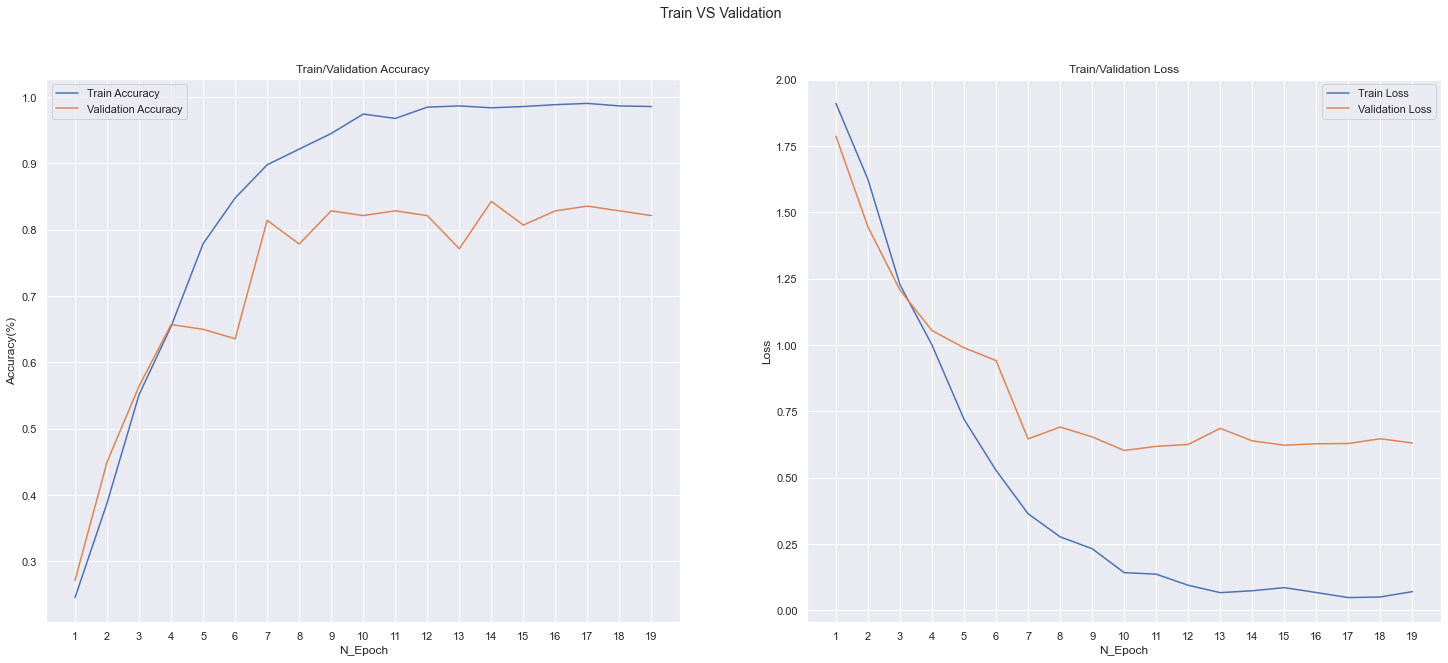

In [329]:
epoch = [i+1 for i in range(19)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()


#### Preview hasil prediksi

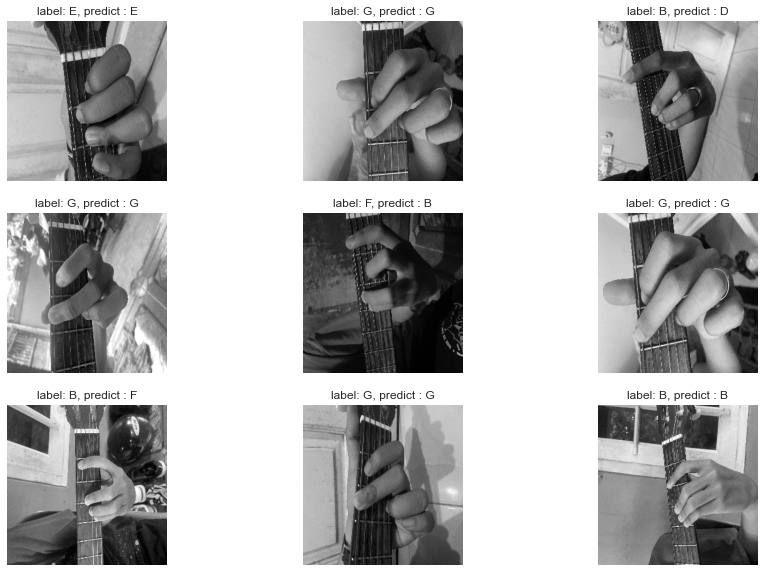

In [335]:
image ,label = next(iter(test))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]),cmap='gray')
    plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')

#### Preview prediction error

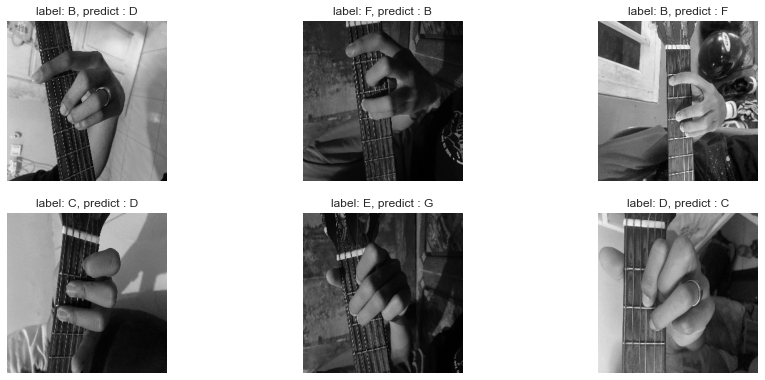

In [338]:
#Plot prediction Error
plt.figure(figsize=(15,10))

i,j = 0
while (j < 6):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))

    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]),cmap='gray')
        plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')
        j+=1
    i+=1


#### Confusion Matrix

In [564]:
test_pred = model.predict(test)
test_pred_labes = np.argmax(test_pred,axis = 1)
test_labels1 = np.concatenate([y for x, y in test], axis=0)
test_labels = [np.argmax(y) for y in test_labels1]

7/7 [==============================] - 6s 171ms/step


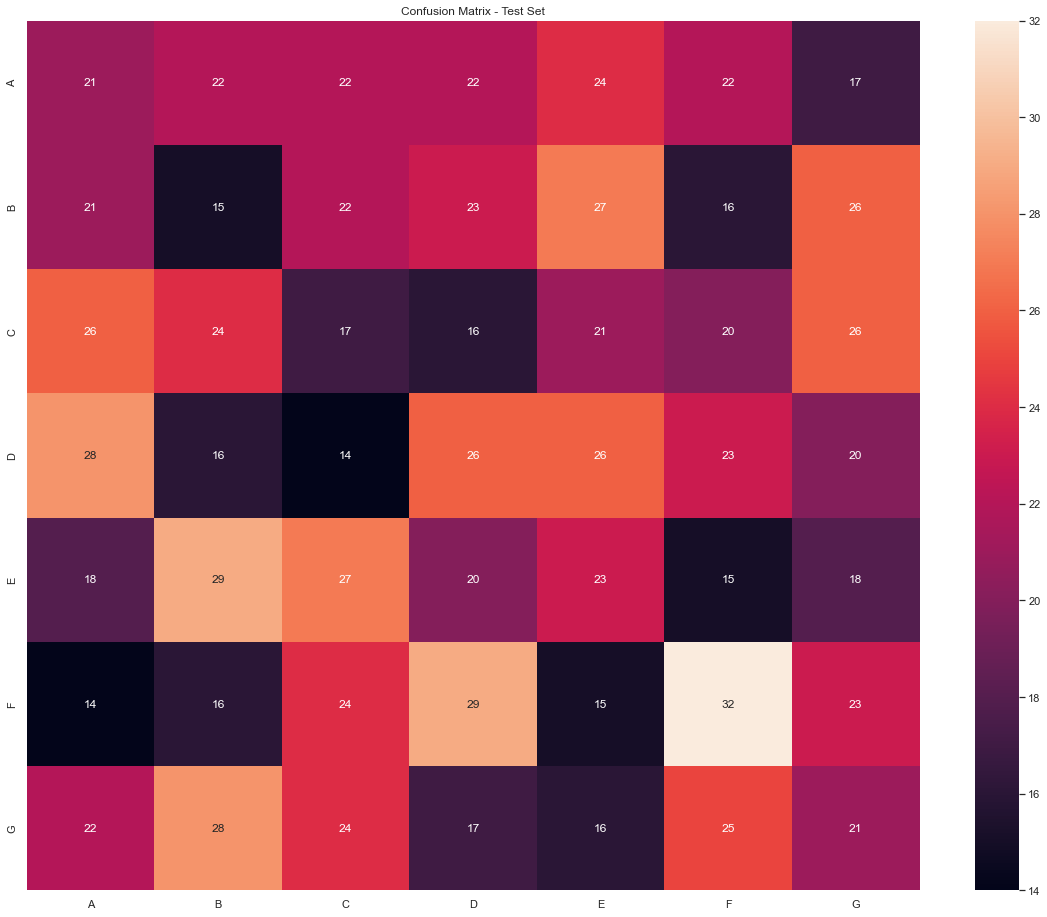

In [538]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_labels,test_pred_labes)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [566]:
#Classification Report
print('Classification Report')
print(classification_report(test_pred_labes, test_labels, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

           A       0.10      0.09      0.10        32
           B       0.13      0.17      0.15        23
           C       0.10      0.10      0.10        29
           D       0.25      0.25      0.25        32
           E       0.13      0.13      0.13        30
           F       0.23      0.17      0.19        41
           G       0.10      0.11      0.10        28

    accuracy                           0.15       215
   macro avg       0.15      0.15      0.15       215
weighted avg       0.15      0.15      0.15       215

